# Vectorization of text data

In [10]:

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url='https://raw.githubusercontent.com/srk-practicum/2022-knu-nlp/kachaikin_branch/Task1_Kachaikin/root2ai%20-%20Data.csv'
df = pd.read_csv(url)
df['Text'].str.replace(r'[.,!?;:()/]{,1}','')
df['Text'].str.replace(r'\s{2,}','')
df['Text'].str.lower()

u=list(df['Text'])
v=list(df['Target'])
indexes_for_labels=sorted([i for i in set(list(df['Target']))])
df_ls=[ [u[i], indexes_for_labels.index(v[i])/100] for i in range(len(u))]

df=pd.DataFrame()
df['Text']=u
df['Target']=[i[1] for i in df_ls]



X_train, X_test, y_train, y_test = train_test_split(df['Text'], 
                                                    df['Target'], test_size=0.5 ,
                                                    random_state=0)


X_train, X_test, y_train, y_test = X_train, X_test, np.array(y_train), np.array(y_test)



vectorizer=TfidfVectorizer(stop_words=stopwords.words("english"))

X_train_vectorized = vectorizer.fit_transform(X_train)
X_train_vectorized = X_train_vectorized.toarray()






[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Model

In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

X_train_vectorized = keras.preprocessing.sequence.pad_sequences(X_train_vectorized, maxlen=100)

inputs = keras.Input(shape = (len(X_train_vectorized[0]),))

x = layers.Embedding(30000,128)(inputs)

x = layers.Dropout(0.5)(x)



x = layers.LSTM(64, return_sequences=False)(x)


outputs = layers.Dense(11, activation="softmax")(x)


model = keras.Model(inputs, outputs)


model.compile(
    optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"],
)
model.summary()

my_callbacks = [tf.keras.callbacks.EarlyStopping(patience=2)]


history = model.fit(X_train_vectorized, y_train, batch_size=128, epochs=10, validation_split=0.2, callbacks = my_callbacks)



Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding_2 (Embedding)     (None, 100, 128)          3840000   
                                                                 
 dropout_2 (Dropout)         (None, 100, 128)          0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense_2 (Dense)             (None, 11)                715       
                                                                 
Total params: 3,890,123
Trainable params: 3,890,123
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
71/71 [==============================]

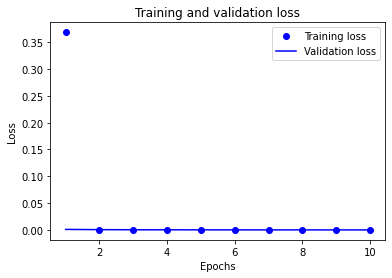

In [12]:
history_dict = history.history
history_dict.keys()
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [14]:

import numpy as np
X_test_vectorized = vectorizer.transform(X_test.apply(lambda x: np.str_(x)))
X_test_vectorized = X_test_vectorized.toarray()
X_test_vectorized = keras.preprocessing.sequence.pad_sequences(X_test_vectorized, maxlen=100)
score = model.evaluate(X_test_vectorized, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])



Test score: 7.545649714302272e-05
Test accuracy: 0.10121564567089081
